CG MSM from "primitive clustering" along rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator
from scipy.optimize import curve_fit

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Get the pops
------

In [4]:
Rvals = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]

pop_sort = []
for R in range(len(Rvals)):
    pop = np.genfromtxt('pop_'+"{:.6f}".format(Rvals[R]))
    pop_sort.append(np.sort(pop)[::-1][::1])

In [5]:
# np.savetxt('pop_sort.dat',pop_sort[6])

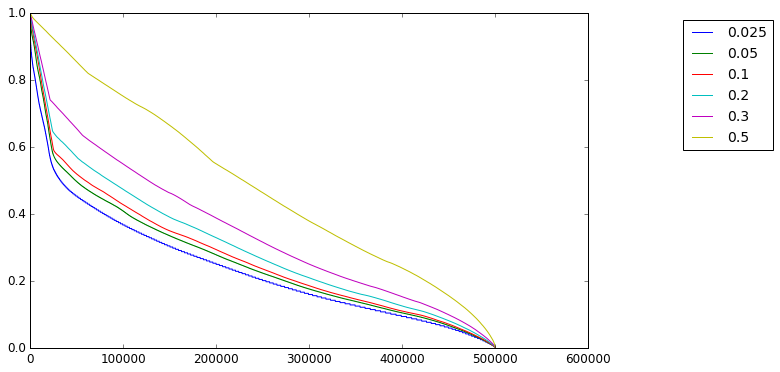

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for i in range(len(Rvals)):
    label=str(Rvals[i])
    plt.plot(pop_sort[i]/pop_sort[i][0],label=label)
legend = plt.legend(fontsize='14',loc='upper center', bbox_to_anchor=(1.25, 1))
#plt.xlim([0,50])
#plt.ylim([0.0,1.])

In [7]:
def exp_func(x, a, c, d):
    return a*np.exp(-c*x)+d

In [8]:
x_val = []
y_val = []
p0 = (1, 1, 1)
y_opt = []
y_cov = []
for i in range(len(Rvals)):
    x_val.append( np.arange(len(pop_sort[i]))/100. )
    y_val.append( (pop_sort[i]/pop_sort[i][0]) )
    tmp_opt, tmp_cov = curve_fit(exp_func, x_val[i], y_val[i])
    y_opt.append( tmp_opt )
    y_cov.append( tmp_cov )

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 1.0)

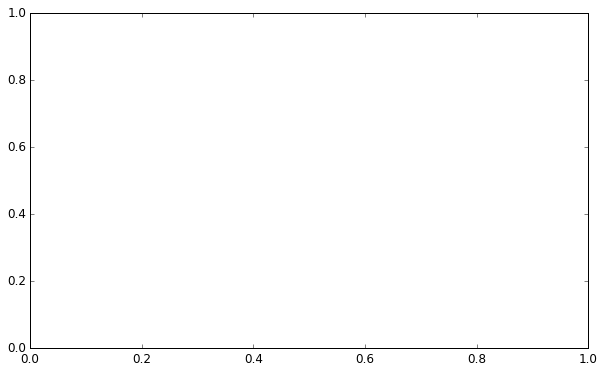

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
y_opt_vals = []
for i in range(0,len(Rvals)):
    label=str(Rvals[i])
    y_opt_vals.append( exp_func( x_val[i], y_opt[i][0], y_opt[i][1], y_opt[i][2] ) )
    if ( i==6 ):
        plt.plot(y_val[i],label=label,linewidth=3, color='k')
        plt.plot( y_opt_vals[i],label=label, linewidth=3, linestyle='--', color='r' )
plt.legend()
legend = plt.legend(fontsize='20',loc='upper center', bbox_to_anchor=(1.25, 1))
# frame = legend.get_frame()
# frame.set_linewidth('2.0')
# ltext = legend.get_texts()
# plt.setp(ltext, fontweight='bold')
#plt.xlim([-200,25000])
plt.ylim([0,1.0])

In [10]:
y_val = np.array(y_val)
y_opt_vals = np.array(y_opt_vals)

In [11]:
ss_res = np.sum( (y_val-y_opt_vals)**2, axis=1)
ss_tot = numpy.sum(( np.subtract( y_val.T, np.mean(y_val,axis=1)).T )**2,axis=1)
rsq = 1. - ss_res/ss_tot

([<matplotlib.axis.XTick at 0x7fe6e7b49b90>,
 <a list of 6 Text xticklabel objects>)

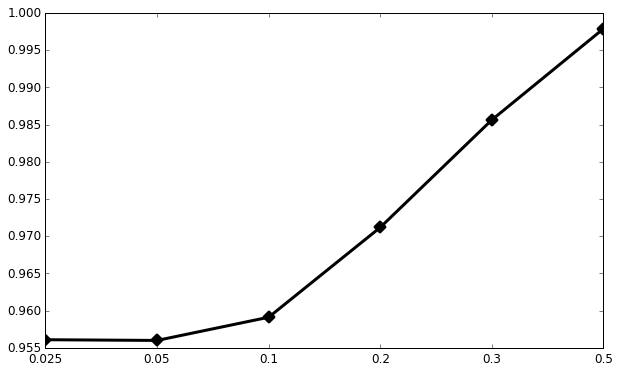

In [12]:
labels = []
for i in range(0,len(Rvals)):
    labels.append(str(Rvals[i]))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(rsq,linewidth=3, color='k',marker='x',mew=10)
plt.xticks(np.arange(len(rsq)),labels)
#plt.legend()
#legend = plt.legend(fontsize='20',loc='upper center', bbox_to_anchor=(1.25, 1))
# frame = legend.get_frame()
# frame.set_linewidth('2.0')
# ltext = legend.get_texts()
# plt.setp(ltext, fontweight='bold')
#plt.xlim([-200,25000])
#plt.ylim([0,1.0])

In [61]:
rsq

array([ 0.86983013,  0.86983013,  0.86983013,  0.86983013,  0.86983013,
        0.86603984,  0.8752767 ,  0.98642208])

In [52]:
ss_tot.shape

(8,)

In [50]:
np.subtract( y_val.T, np.mean(y_val,axis=1)).shape

(25010, 8)

In [27]:
y_val[0][::50]

array([  1.00000000e+00,   1.00000000e+00,   8.06041881e-01,
         6.38345348e-01,   5.63165122e-01,   4.90044628e-01,
         4.83178853e-01,   4.56059046e-01,   4.27222794e-01,
         4.12461380e-01,   3.90147614e-01,   3.72811535e-01,
         3.67147271e-01,   3.54617233e-01,   3.38654308e-01,
         3.15653965e-01,   3.15139032e-01,   3.10847923e-01,
         3.01064195e-01,   2.96258153e-01,   2.94198421e-01,
         2.87847580e-01,   2.79608651e-01,   2.77033986e-01,
         2.75317542e-01,   2.65362170e-01,   2.58153107e-01,
         2.56608308e-01,   2.49742533e-01,   2.44078270e-01,
         2.41503605e-01,   2.35667697e-01,   2.33436320e-01,
         2.27085479e-01,   2.21249571e-01,   2.19876416e-01,
         2.16100240e-01,   2.13353931e-01,   2.11809131e-01,
         2.09234466e-01,   2.03913491e-01,   2.02883625e-01,
         2.00137315e-01,   1.96017851e-01,   1.93786474e-01,
         1.92584964e-01,   1.91555098e-01,   1.89667010e-01,
         1.86920700e-01,